# Importing required Libraries

In [13]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from matplotlib import pyplot # for data visulization
from tensorflow import keras # for building Neural Networks
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layers.
# for checking accuracy scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # for spliting data into train test data.
import matplotlib.pyplot as plt

# Importing Dataset
Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

date time year-month-day hour:minute:second
Temperature, in Celsius
Relative Humidity, %
Light, in Lux
CO2, in ppm
Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

In [2]:
# load all datasets
testData = pd.read_csv('datatest.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
trainData = pd.read_csv('datatraining.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
testData1 = pd.read_csv('datatest2.txt', header=0, index_col=1, parse_dates=True, squeeze=True)

# vertically stack datasets
data = pd.concat([testData, trainData, testData1])

# drop row number
data.drop('date', axis=1, inplace=True)

# save aggregated dataset
data.to_csv('occupancy.csv')

/tmp/ipykernel_17665/2640172379.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  testData = pd.read_csv('datatest.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
/tmp/ipykernel_17665/2640172379.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  trainData = pd.read_csv('datatraining.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
/tmp/ipykernel_17665/2640172379.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  testData1 = pd.read_csv('datatest2.txt', header=0, index_col=1, parse_dates=True, squeeze=True)


##### This is a pre-processed datasets so there is no need to pre-process it.

## Spliting dataset

In [3]:
# load the dataset
data = pd.read_csv('occupancy.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = data.values
# split data into inputs and outputs
X, y = values[:, :-1], values[:, -1]
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)

/tmp/ipykernel_17665/2855591344.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv('occupancy.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


# Model Building and Training

In [26]:
# specifying the structure of neural network.
model = Sequential(name="Model-Input") # Model
model.add(Input(shape=(5,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(3, activation='softplus', name='Hidden-Layer')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

In [27]:
# Compiling model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

In [28]:
# Training model using training data
history = model.fit(X_train, y_train, batch_size=10, epochs=10, shuffle=True)

Epoch 1/10
1440/1440 [==============================] - 1s 720us/step - loss: 0.1987 - Accuracy: 0.9064 - precision: 0.7380 - recall: 0.9786
Epoch 2/10
1440/1440 [==============================] - 1s 721us/step - loss: 0.1421 - Accuracy: 0.9343 - precision: 0.7952 - recall: 0.9981
Epoch 3/10
1440/1440 [==============================] - 1s 740us/step - loss: 0.1285 - Accuracy: 0.9398 - precision: 0.8092 - recall: 0.9984
Epoch 4/10
1440/1440 [==============================] - 1s 713us/step - loss: 0.1173 - Accuracy: 0.9451 - precision: 0.8232 - recall: 0.9981
Epoch 5/10
1440/1440 [==============================] - 1s 714us/step - loss: 0.1065 - Accuracy: 0.9575 - precision: 0.8575 - recall: 0.9984
Epoch 6/10
1440/1440 [==============================] - 1s 712us/step - loss: 0.0951 - Accuracy: 0.9673 - precision: 0.8875 - recall: 0.9975
Epoch 7/10
1440/1440 [==============================] - 1s 721us/step - loss: 0.0870 - Accuracy: 0.9723 - precision: 0.9039 - recall: 0.9967
Epoch 8/10
14

In [29]:
# Making predictions.
pred_train = (model.predict(X_train) > 0.5).astype(int) # using training data
pred_test = (model.predict(X_test) > 0.5).astype(int) # using testing data

# Model Performance Summary

In [30]:
# model summary
model.summary()

Model: "Model-Input"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer (Dense)        (None, 3)                 18        
                                                                 
 Output-Layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Weights and Biases
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # weights
    print("  --Biases: ", layer.get_weights()[1]) # biases

Layer:  Hidden-Layer
  --Kernels (Weights):  [[ 0.09196211  0.18722719 -2.1995103 ]
 [-0.18996994  0.521987   -1.6762264 ]
 [ 0.11457312 -0.07438239  0.28166425]
 [-0.25631693 -0.01723089  0.06438698]
 [-0.02128053 -0.267908   -1.2838439 ]]
  --Biases:  [-0.02546623  0.93112534 -2.586357  ]
Layer:  Output-Layer
  --Kernels (Weights):  [[-0.71507424]
 [-0.718955  ]
 [ 0.05229846]]
  --Biases:  [-2.299334]


In [32]:
# Evaluation on training data
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     10739
         1.0       0.94      0.99      0.97      3653

    accuracy                           0.98     14392
   macro avg       0.97      0.99      0.98     14392
weighted avg       0.98      0.98      0.98     14392



In [33]:
# Evaluation on testing data
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      5071
         1.0       0.98      1.00      0.99      1097

    accuracy                           1.00      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       1.00      1.00      1.00      6168



[[5043   28]
 [   2 1095]]


/tmp/ipykernel_17665/3397541056.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_17665/3397541056.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


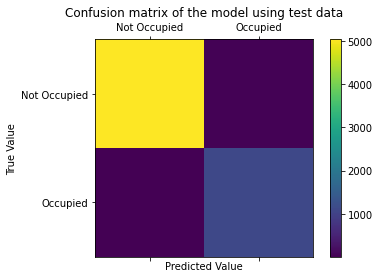

In [34]:
# Confusion matrix
labels = ['Not Occupied', 'Occupied']
cm = confusion_matrix(y_test, pred_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the model using test data')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

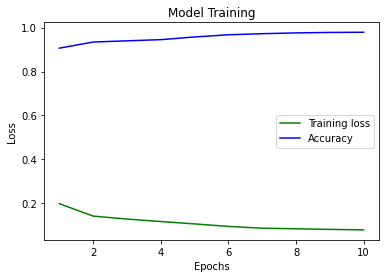

In [36]:
# model training visualization
loss = history.history['loss']
accuracy = history.history['Accuracy']
precision = history.history['precision']
recall = history.history['recall']
epochs = range(1,11)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, accuracy, 'b', label='Accuracy')
plt.title('Model Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model number 2

In [47]:
# specifying the structure of neural network.
model = Sequential(name="Model-Input") # Model
model.add(Input(shape=(5,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(4, activation='softplus', name='Hidden-Layer-1')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model.add(Dense(3, activation='softplus', name='Hidden-Layer-2'))
model.add(Dense(2, activation='softplus', name='Hidden-Layer-3'))
model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

In [48]:
# Compiling model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['Accuracy'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
             )

In [49]:
# Training model using training data
history = model.fit(X_train, y_train, batch_size=10, epochs=10, shuffle=True)

Epoch 1/10
1440/1440 [==============================] - 1s 734us/step - loss: 1.9393 - Accuracy: 0.8924
Epoch 2/10
1440/1440 [==============================] - 1s 761us/step - loss: 0.1402 - Accuracy: 0.9427
Epoch 3/10
1440/1440 [==============================] - 1s 704us/step - loss: 0.1252 - Accuracy: 0.9479
Epoch 4/10
1440/1440 [==============================] - 1s 693us/step - loss: 0.1147 - Accuracy: 0.9530
Epoch 5/10
1440/1440 [==============================] - 1s 679us/step - loss: 0.1025 - Accuracy: 0.9606
Epoch 6/10
1440/1440 [==============================] - 1s 679us/step - loss: 0.0890 - Accuracy: 0.9687
Epoch 7/10
1440/1440 [==============================] - 1s 679us/step - loss: 0.0727 - Accuracy: 0.9811
Epoch 8/10
1440/1440 [==============================] - 1s 687us/step - loss: 0.0694 - Accuracy: 0.9844
Epoch 9/10
1440/1440 [==============================] - 1s 697us/step - loss: 0.0689 - Accuracy: 0.9842
Epoch 10/10
1440/1440 [==============================] - 1s 686u

In [50]:
# Making predictions.
pred_train = (model.predict(X_train) > 0.5).astype(int) # using training data
pred_test = (model.predict(X_test) > 0.5).astype(int) # using testing data

# Model Performance

In [51]:
# model summary
model.summary()

Model: "Model-Input"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 4)                 24        
                                                                 
 Hidden-Layer-2 (Dense)      (None, 3)                 15        
                                                                 
 Hidden-Layer-3 (Dense)      (None, 2)                 8         
                                                                 
 Output-Layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Weights and Biases
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # weights
    print("  --Biases: ", layer.get_weights()[1]) # biases

Layer:  Hidden-Layer-1
  --Kernels (Weights):  [[ 1.9910152  -1.057618    0.7110765  -0.13331692]
 [ 0.15966947 -0.24847108  0.7871444  -0.08585906]
 [-0.17655951 -0.0536657  -0.27496755  0.1653819 ]
 [ 0.10771142  0.49435535 -0.20168263 -0.58051896]
 [ 1.1277553  -0.3200541   0.26612282 -0.7172345 ]]
  --Biases:  [ 1.8360885e+00 -9.9931628e-01  1.1846325e-18 -1.4753973e-01]
Layer:  Hidden-Layer-2
  --Kernels (Weights):  [[ 0.44252393 -0.8097353  -0.72086203]
 [ 0.41234776  0.14053956  0.3278782 ]
 [ 0.37512064  0.09325647 -0.7412258 ]
 [-0.646255   -0.8051801  -0.1392173 ]]
  --Biases:  [ 0.54327786  1.3090916  -1.5142775 ]
Layer:  Hidden-Layer-3
  --Kernels (Weights):  [[ 1.1450447   0.96071243]
 [ 1.0494394  -0.10012797]
 [-0.8749008   0.5356473 ]]
  --Biases:  [ 1.753157  -1.4773035]
Layer:  Output-Layer
  --Kernels (Weights):  [[-0.15249175]
 [ 0.12991226]]
  --Biases:  [-1.5755627]


In [53]:
# Evaluation on training data
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     10739
         1.0       0.96      1.00      0.98      3653

    accuracy                           0.99     14392
   macro avg       0.98      0.99      0.98     14392
weighted avg       0.99      0.99      0.99     14392



In [54]:
# Evaluation on testing data
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      5071
         1.0       0.96      1.00      0.98      1097

    accuracy                           0.99      6168
   macro avg       0.98      1.00      0.99      6168
weighted avg       0.99      0.99      0.99      6168



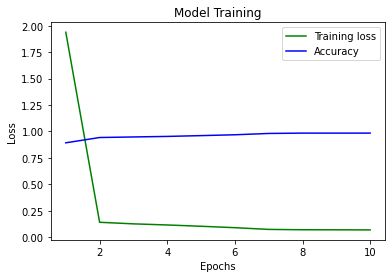

In [55]:
# Training visualization
loss = history.history['loss']
accuracy = history.history['Accuracy']
epochs = range(1,11)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, accuracy, 'b', label='Accuracy')
plt.title('Model Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[[5027   44]
 [   1 1096]]


/tmp/ipykernel_17665/3397541056.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_17665/3397541056.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


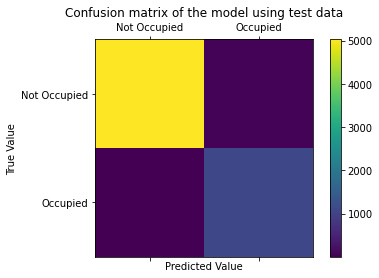

In [56]:
# Confusion matrix
labels = ['Not Occupied', 'Occupied']
cm = confusion_matrix(y_test, pred_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the model using test data')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()